Sneha Kelkar, Net ID: 2826186

# 1. Introduction
#### In this notebook, we will be training different models to classify the state of the fetus from different sound features provided in the dataset.
#### The dataset contains 21 features and 1 target variable, which is the state of the fetus.

# 2. Methods
We will be training the following models:
1. SVM with linear kernel and one-vs-one strategy.
2. SVM with rbf, poly and sigmoid kernels and one-vs-rest strategy.
3. Naive Bayes.
4. Logistic Regression.

  We will be using MinMaxScaler to scale the features from 0 to 1 to ensure that all features are non-negative for the Naive Bayesian classifier to work.
  
  We will be using GridSearchCV to find the best hyperparameters for each model.
After training the models, we will be using confusion matrices to visualize the performance of the models.
  
  We will be using accuracy, precision, recall, f1-score and roc-auc score as evaluation metrics.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset_ctg.csv to dataset_ctg.csv


In [2]:
import pandas as pd #Library for data manipulation
import numpy as np #Library for scientific computing
import matplotlib.pyplot as plt #Library for data visualization

In [22]:
#Load the data
df = pd.read_csv('dataset_ctg.csv')
X = df.drop(columns=['NSP'],axis = 1)
y = df['NSP']

In [23]:
# Scaling the data to [0,1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Here I used train_test_split
#insted of using parameter stratify = y, train_test_split shuffles by default, especially since we are using gridsearchCV, so there is cross validation already
#making it this way made my code run faster and also prevented us from repating the cross validation step twice

scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 1: SVM with linear kernel and one-vs-one strategy.

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = [
    {'C': [0.1, 1, 10, 100],
     'gamma': [0.01, 0.1, 1, 10],
     'probability' : [True],
     'decision_function_shape': ['ovo'],
     'kernel': ['linear']}
]
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'decision_function_shape': ['ovo'],
                          'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear'],
                          'probability': [True]}],
             return_train_score=True, scoring='accuracy')

In [7]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'linear', 'probability': True}
Best cross-validation score: 0.90


In [8]:
best_svm_linear_ovo = SVC(**grid_search.best_params_)
best_svm_linear_ovo.fit(X_train, y_train)

SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='linear',
    probability=True)

### Task 2: SVM with rbf, poly and sigmoid kernels and one-vs-rest strategy.

In [9]:
from sklearn.svm import SVC
svm = SVC()
param_grid = [
    {'C': [0.1, 1, 10, 100],
     'gamma': [0.01, 0.1, 1, 10],
     'kernel': ['rbf', 'poly', 'sigmoid'],
     'probability' : [True],
     'decision_function_shape': ['ovr']}
]
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'decision_function_shape': ['ovr'],
                          'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf', 'poly', 'sigmoid'],
                          'probability': [True]}],
             return_train_score=True, scoring='accuracy')

In [10]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 1, 'decision_function_shape': 'ovr', 'gamma': 1, 'kernel': 'poly', 'probability': True}
Best cross-validation score: 0.93


In [11]:
best_svm_ovr = SVC(**grid_search.best_params_)
best_svm_ovr.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='poly', probability=True)

### Task 3: Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
param_grid = [
    {'alpha': [0.1, 1, 10, 100]}
]
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid=[{'alpha': [0.1, 1, 10, 100]}], return_train_score=True,
             scoring='accuracy')

In [14]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'alpha': 0.1}
Best cross-validation score: 0.81


In [15]:
best_nb = MultinomialNB(**grid_search.best_params_)
best_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

###Task 4: Logistic Regression

In [16]:
from sklearn.linear_model import SGDClassifier
log_reg = SGDClassifier()
param_grid = [
 {'loss': ['log_loss'],
  'penalty': ['l2', 'l1', 'elasticnet'],
  'alpha': [0.0001, 0.001, 0.01, 0.1],
  'max_iter': [1000, 2000, 3000],
  'n_jobs': [-1]}
]
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1],
                          'loss': ['log_loss'], 'max_iter': [1000, 2000, 3000],
                          'n_jobs': [-1],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [17]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 3000, 'n_jobs': -1, 'penalty': 'l1'}
Best cross-validation score: 0.90


In [18]:
best_log_reg = SGDClassifier(**grid_search.best_params_)
best_log_reg.fit(X_train, y_train)



SGDClassifier(loss='log_loss', max_iter=3000, n_jobs=-1, penalty='l1')

### Task 5: Analyzing the error matrices

<Figure size 1800x1800 with 0 Axes>

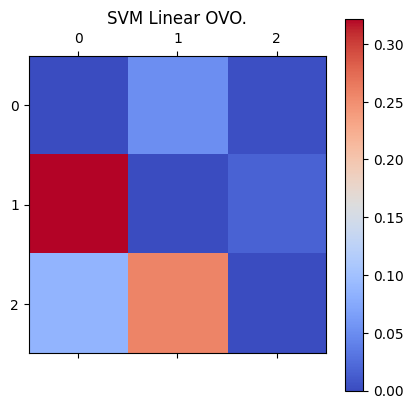

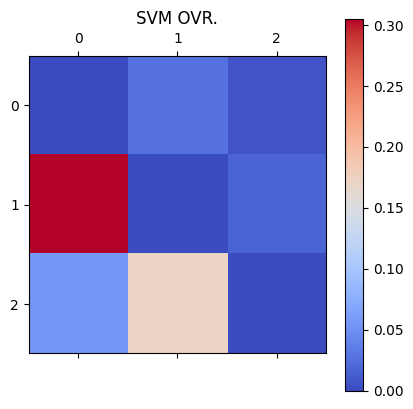

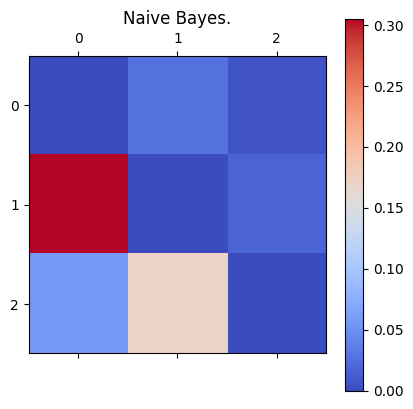

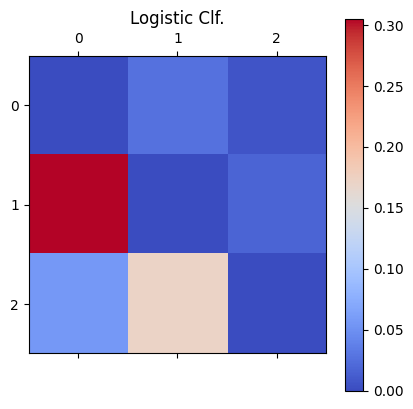

In [19]:
from sklearn.metrics import confusion_matrix

Y_pred_A = best_svm_linear_ovo.predict(X_test)
CM_A = confusion_matrix(y_test, Y_pred_A)

Y_pred_B = best_svm_ovr.predict(X_test)
CM_B = confusion_matrix(y_test, Y_pred_B)

Y_pred_C = best_svm_ovr.predict(X_test)
CM_C = confusion_matrix(y_test, Y_pred_C)

Y_pred_D = best_svm_ovr.predict(X_test)
CM_D = confusion_matrix(y_test, Y_pred_D)

CM_A = CM_A.astype('float') / CM_A.sum(axis=1)[:, np.newaxis]
CM_B = CM_B.astype('float') / CM_B.sum(axis=1)[:, np.newaxis]
CM_C = CM_C.astype('float') / CM_C.sum(axis=1)[:, np.newaxis]
CM_D = CM_D.astype('float') / CM_D.sum(axis=1)[:, np.newaxis]

np.fill_diagonal(CM_A,0)
np.fill_diagonal(CM_B,0)
np.fill_diagonal(CM_C,0)
np.fill_diagonal(CM_D,0)

plt.figure(1, figsize=(18, 18))
plt.matshow(CM_A, cmap=plt.cm.coolwarm)
plt.title('SVM Linear OVO.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_B, cmap=plt.cm.coolwarm)
plt.title('SVM OVR.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_C, cmap=plt.cm.coolwarm)
plt.title('Naive Bayes.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_D, cmap=plt.cm.coolwarm)
plt.title('Logistic Clf.')
plt.tight_layout
plt.colorbar()
plt.show()

###All the models have similar confusion matrices; all of them seem to struggle with classifying the 1st class

In [20]:
Y_pred_A = best_svm_linear_ovo.predict(X_test)
Y_pred_B = best_svm_ovr.predict(X_test)
Y_pred_C = best_nb.predict(X_test)
Y_pred_D = best_log_reg.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
for i in range(0,4):
 if (i==0):
  name = 'SVM Linear OVO'
  Y_pred = Y_pred_A
  y_pred_prob = best_svm_linear_ovo.predict_proba(X_test)
 if (i==1):
  name = 'SVM OVR'
  Y_pred = Y_pred_B
  y_pred_prob = best_svm_ovr.predict_proba(X_test)
 if (i==2):
  name = 'Naive Bayes'
  Y_pred = Y_pred_C
  y_pred_prob = best_nb.predict_proba(X_test)
 if (i==3):
  name = 'Logistic Classification'
  Y_pred = Y_pred_D
  y_pred_prob = best_log_reg.predict_proba(X_test)

 acc = accuracy_score(y_test, Y_pred)
 prec= precision_score(y_test, Y_pred,average='macro')
 recl= recall_score(y_test, Y_pred,average='macro')
 f1sc= f1_score(y_test, Y_pred,average='macro')
 roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')
 print('%s: acc= %1.4f \t prec=%1.4f \t rec=%1.4f \t f1=%1.4f \t roc_auc=%1.4f' %(name, acc, prec, recl, f1sc, roc_auc))

SVM Linear OVO: acc= 0.8826 	 prec=0.8182 	 rec=0.7546 	 f1=0.7786 	 roc_auc=0.9623
SVM OVR: acc= 0.9108 	 prec=0.8562 	 rec=0.8054 	 f1=0.8288 	 roc_auc=0.9703
Naive Bayes: acc= 0.8099 	 prec=0.6646 	 rec=0.4308 	 f1=0.4572 	 roc_auc=0.8877
Logistic Classification: acc= 0.8756 	 prec=0.8002 	 rec=0.7516 	 f1=0.7695 	 roc_auc=0.9551


# 3. Results

###The best model is SVM with a kernel transformation and One-vs-Rest strategy across all metrics
###Followed by the Linear SVM, Logistic Classification model , and finally, Naive Bayes model.